# Importación de librerías y archivos necesarios

In [16]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
import pandas as pd
import os

In [17]:
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [2]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

# Ejercicio 1

<Axes: >

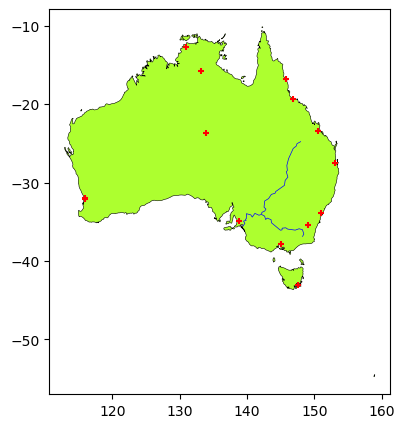

In [36]:
australia=countries[countries.COUNTRY=='Australia']
citiesaustralia_clipped = gpd.clip(gdf=cities, mask=australia)
riversaustralia_clipped = gpd.clip(gdf=rivers, mask=australia)
base = australia.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesaustralia_clipped.plot(marker='+', color='red', markersize=15,ax=base)
riversaustralia_clipped.plot(edgecolor='blue', linewidth=0.5, ax=base)

# Ejercicio 2

In [37]:
australia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
australia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [39]:
#No está proyectado
australia.crs.is_projected

False

In [40]:
#Centroide no preciso
australia.centroid

C:\Users\Rofer\AppData\Local\Temp\ipykernel_10644\2151654150.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  australia.centroid


11    POINT (134.48956 -25.73497)
dtype: geometry

Se usa la proyección:  https://epsg.io/3112

In [41]:
australia.to_crs(3112).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [42]:
#Nuevo centroide
australia.to_crs(3112).centroid

11    POINT (32199.226 -2924192.688)
dtype: geometry

<Axes: >

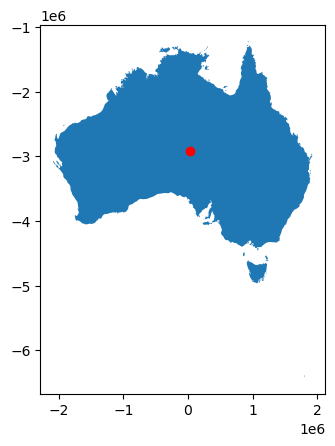

In [43]:
# Reploteo:
base3112=australia.to_crs(3112).plot()
australia.to_crs(3112).centroid.plot(color='red',ax=base3112)

In [44]:
australia_3112=australia.to_crs(3112)
cities_australia_3112=citiesaustralia_clipped.to_crs(australia_3112.crs)
rivers_australia_3112=riversaustralia_clipped.to_crs(australia_3112.crs)

In [45]:
australia_3112.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
australia_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='country', driver="GPKG")
cities_australia_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='cities', driver="GPKG")
rivers_australia_3112.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='rivers', driver="GPKG")
australia_3112.centroid.to_file(os.path.join("maps","australiaMaps_3112.gpkg"), layer='centroid', driver="GPKG")

# Ejercicio 3

In [47]:
infoairports=pd.read_csv(os.path.join("data","au-airports.csv"))

In [48]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,27066,YMML,large_airport,Melbourne International Airport,-37.673302,144.843002,434.0,OC,Australia,AU,...,Melbourne,1,YMML,MEL,NaN,http://melbourneairport.com.au/,https://en.wikipedia.org/wiki/Melbourne_Airport,NaN,1016075,2017-03-06T19:29:22+00:00
1,26901,YBBN,large_airport,Brisbane International Airport,-27.384199,153.117004,13.0,OC,Australia,AU,...,Brisbane,1,YBBN,BNE,NaN,NaN,https://en.wikipedia.org/wiki/Brisbane_Airport,NaN,1013175,2008-06-26T14:52:34+00:00
2,27119,YPPH,large_airport,Perth International Airport,-31.940300,115.967003,67.0,OC,Australia,AU,...,Perth,1,YPPH,PER,NaN,NaN,https://en.wikipedia.org/wiki/Perth_Airport,NaN,51375,2008-06-26T14:52:34+00:00
3,26904,YBCS,medium_airport,Cairns International Airport,-16.885799,145.755005,10.0,OC,Australia,AU,...,Cairns,1,YBCS,CNS,NaN,NaN,https://en.wikipedia.org/wiki/Cairns_Internati...,NaN,750,2010-08-29T23:17:14+00:00
4,27096,YPAD,large_airport,Adelaide International Airport,-34.947512,138.533393,20.0,OC,Australia,AU,...,Adelaide,1,YPAD,ADL,NaN,NaN,https://en.wikipedia.org/wiki/Adelaide_Interna...,NaN,1000,2021-10-07T11:04:02+00:00


In [49]:
infoairports.columns


Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [50]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2660 non-null   object 
 1   type           2660 non-null   object 
 2   latitude_deg   2660 non-null   float64
 3   longitude_deg  2660 non-null   float64
 4   elevation_ft   1447 non-null   float64
 5   region_name    2660 non-null   object 
 6   municipality   1423 non-null   object 
dtypes: float64(3), object(4)
memory usage: 145.6+ KB


In [51]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [52]:
# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2660 non-null   object 
 1   type           2660 non-null   object 
 2   latitude_deg   2660 non-null   float64
 3   longitude_deg  2660 non-null   float64
 4   elevation_ft   1447 non-null   float64
 5   region_name    2660 non-null   object 
 6   municipality   1423 non-null   object 
dtypes: float64(3), object(4)
memory usage: 145.6+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

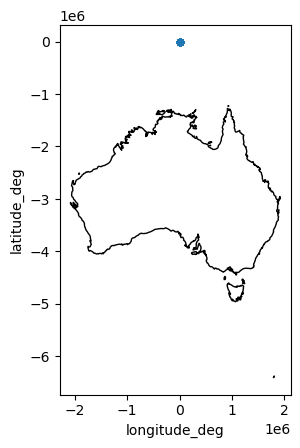

In [53]:
# let's plot

base = australia_3112.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

<Axes: >

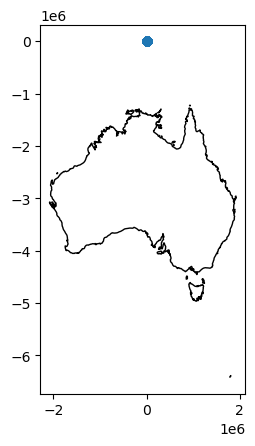

In [54]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),geometry=gpd.points_from_xy(infoairports.longitude_deg,
                infoairports.latitude_deg),
                 crs=australia.crs.to_epsg())
base = australia_3112.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [55]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

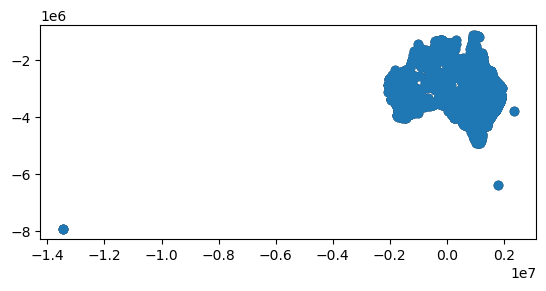

In [56]:
airports_3112=airports.to_crs(3112)
base = airports_3112.plot(color='white', edgecolor='black')
airports_3112.plot(ax=base)

In [102]:
airports_3112.cx[:-1.2e7,:] #los dos son erroneos, por lo tanto se deben eliminar

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
968,(Duplicate)Bombala Airport,small_airport,-0.036,0.0149,2415.0,New South Wales,NaN,POINT (-13460261.384 -7946722.529)
1416,(Duplicate)Brighton Downs Airport,small_airport,-0.013,0.0140,NaN,Queensland,NaN,POINT (-13462761.828 -7945467.252)


In [103]:
airports = airports[~airports['name'].isin(['(Duplicate)Bombala Airport','(Duplicate)Brighton Downs Airport'])]

In [104]:
airports_3112=airports_3112[~airports_3112['name'].isin(['(Duplicate)Bombala Airport','(Duplicate)Brighton Downs Airport'])]

<Axes: >

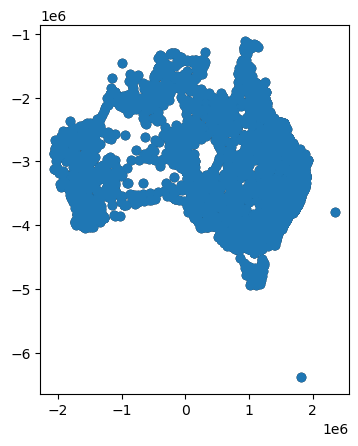

In [108]:
base = airports_3112.plot(color='white', edgecolor='black')
airports_3112.plot(ax=base)

# Ejercicio 4

In [111]:
australia_3112

,COUNTRY,geometry
11,Australia,"MULTIPOLYGON (((933348.661 -1235788.329, 92574..."


<Axes: >

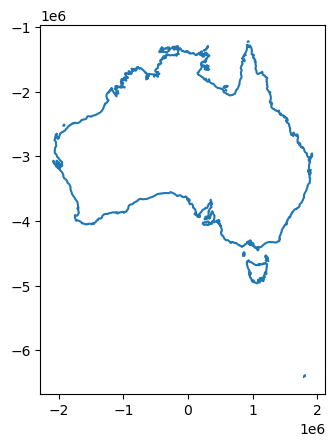

In [112]:
australia_3112.boundary.plot()

In [113]:
type(australia_3112.boundary)

geopandas.geoseries.GeoSeries

In [114]:
australia_3112.boundary.to_frame()

,0
11,"MULTILINESTRING ((933348.661 -1235788.329, 925..."


In [115]:
australia_border=australia_3112.boundary.to_frame()
australia_border['name']='australia'
australia_border.rename(columns={0:'geometry'},inplace=True)
australia_border = australia_border.set_geometry("geometry")
australia_border.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - Australian Capital Territory; New South Wales; Northern Territory; Queensland; South Australia; Tasmania; Western Australia; Victoria.
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [116]:
australia_border

,geometry,name
11,"MULTILINESTRING ((933348.661 -1235788.329, 925...",australia


# Ejercicio 5

In [126]:
ruta=os.path.join("data","kontur_boundaries_AU_20230628.gpkg")

In [127]:
listlayers(ruta)

['boundaries']

In [128]:
australia_territories=gpd.read_file(ruta)

In [135]:
australia_territories.admin_level.unique()

array([ 2,  4,  6,  8, 11, 12], dtype=int64)

#2 es el país, #4 son las provincias, #6 podrían ser las municipalidades:  https://wiki.openstreetmap.org/wiki/Key:admin_level

In [137]:
australia_states=australia_territories[australia_territories.admin_level==4]
australia_municipalities=australia_territories[australia_territories.admin_level==6]

In [141]:
australia_states.geometry.head()

1    MULTIPOLYGON (((150.59237 -35.17546, 150.59241...
2    MULTIPOLYGON (((140.96190 -35.79979, 140.96260...
3    MULTIPOLYGON (((72.24619 -53.02073, 72.24644 -...
4    MULTIPOLYGON (((129.00140 -31.74161, 129.00142...
5    MULTIPOLYGON (((137.99465 -16.53946, 137.99484...
Name: geometry, dtype: geometry

In [142]:
australia_municipalities.geometry.head()

16    MULTIPOLYGON (((137.59586 -32.67242, 137.61386...
17    MULTIPOLYGON (((137.92301 -32.49460, 137.92301...
18    MULTIPOLYGON (((129.00184 -25.99861, 129.03401...
19    MULTIPOLYGON (((150.61779 -33.92965, 150.61844...
20    MULTIPOLYGON (((117.71051 -20.55046, 117.71346...
Name: geometry, dtype: geometry

In [143]:
australia_states.crs, australia_municipalities.crs #tienen crs, pero falta convertir

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

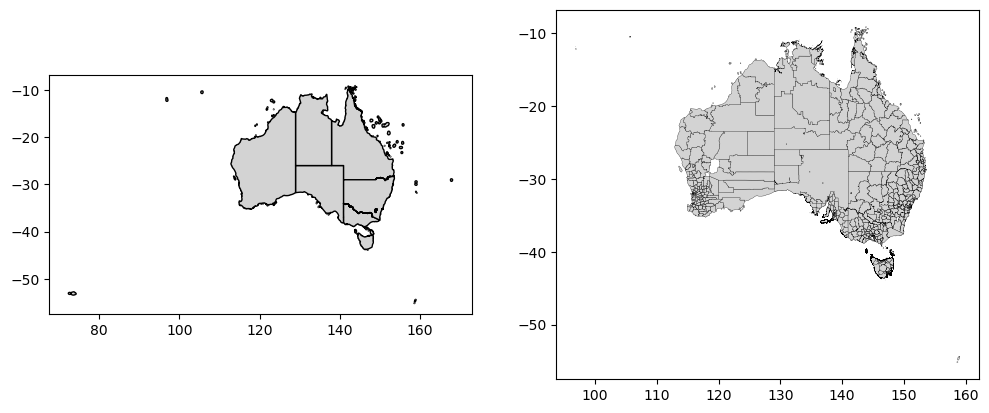

In [144]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

australia_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
australia_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [146]:
australia_states=australia_states.to_crs(3112)
australia_municipalities=australia_municipalities.to_crs(3112)

# Ejercicio 6

<Axes: >

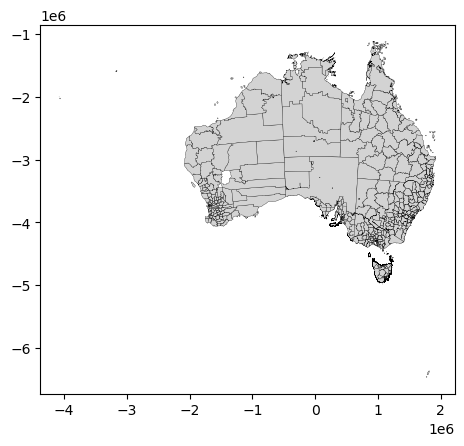

In [147]:
australia_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [148]:
australia_municipalities.head()

,admin_level,osm_admin_level,name,name_en,population,hasc,geometry
16,6,6,Port Augusta City Council,None,14527.0,None,"MULTIPOLYGON (((334689.193 -3687601.411, 33636..."
17,6,6,The Flinders Ranges Council,None,1572.0,None,"MULTIPOLYGON (((365740.293 -3668953.254, 36575..."
18,6,6,Anangu Pitjantjatjara Yankunytjatjara,None,1963.0,None,"MULTIPOLYGON (((-494241.707 -2961002.508, -491..."
19,6,6,Liverpool City Council,None,218927.0,None,"MULTIPOLYGON (((1524160.875 -3922280.406, 1524..."
20,6,6,Town Of Port Hedland,None,14812.0,None,"MULTIPOLYGON (((-1683931.758 -2462938.778, -16..."


In [149]:
australia_municipalities

,admin_level,osm_admin_level,name,name_en,population,hasc,geometry
16,6,6,Port Augusta City Council,None,14527.0,None,"MULTIPOLYGON (((334689.193 -3687601.411, 33636..."
17,6,6,The Flinders Ranges Council,None,1572.0,None,"MULTIPOLYGON (((365740.293 -3668953.254, 36575..."
18,6,6,Anangu Pitjantjatjara Yankunytjatjara,None,1963.0,None,"MULTIPOLYGON (((-494241.707 -2961002.508, -491..."
19,6,6,Liverpool City Council,None,218927.0,None,"MULTIPOLYGON (((1524160.875 -3922280.406, 1524..."
20,6,6,Town Of Port Hedland,None,14812.0,None,"MULTIPOLYGON (((-1683931.758 -2462938.778, -16..."
...,...,...,...,...,...,...,...
559,6,6,Cabonne Council,None,13250.0,None,"MULTIPOLYGON (((1317212.570 -3847548.906, 1317..."
560,6,6,Kempsey Shire Council,None,31143.0,None,"MULTIPOLYGON (((1721374.572 -3624258.936, 1721..."
561,6,6,The Council of the Municipality of Kiama,None,20825.0,None,"MULTIPOLYGON (((1511746.522 -4003208.788, 1511..."
562,6,6,Shire Of Cunderdin,None,1527.0,None,"MULTIPOLYGON (((-1609148.870 -3666730.301, -16..."


C:\Users\Rofer\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1813: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

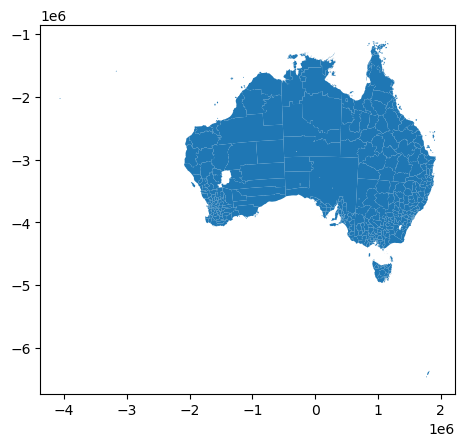

In [152]:
#Se debe crear el dataframe
munis_states_australia=australia_states.overlay(australia_municipalities, how="intersection",keep_geom_type=True)
munis_states_australia.plot()

In [155]:
munis_states_australia.name_1.value_counts()

name_1
Western Australia                                 136
New South Wales                                   128
Victoria                                           85
Queensland                                         76
South Australia                                    74
Tasmania                                           29
Northern Territory                                 18
Christmas Island                                    1
Cocos (Keeling) Islands / Pulu Kokos (Keeling)      1
Name: count, dtype: int64

<Axes: >

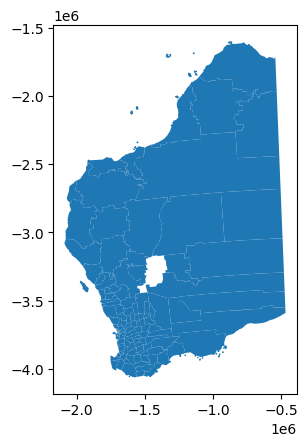

In [156]:
munis_states_australia[munis_states_australia.name_1=='Western Australia'].plot()

# Ejercicio 7

## Ejercicio 8